<a href="https://colab.research.google.com/github/Omprakash977/Regression-/blob/main/Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

In [1]:
# Importing the libraries
import numpy as np
import pandas as pd

from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Reading and understanding the data

In [2]:
# Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/Datasets/SeoulBikeData.csv', encoding= 'unicode_escape',parse_dates=True)

In [4]:
# Exploring the first five rows of the dataset
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [5]:
# Exploring the last five rows of the dataset
df.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [6]:
# Inspecting the length and number of columns of the dataset
df.shape

(8760, 14)

In [7]:
# Checking null values and data types of each columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [8]:
# duplicate
print(df[df.duplicated()].sum())

Date                         0.0
Rented Bike Count            0.0
Hour                         0.0
Temperature(°C)              0.0
Humidity(%)                  0.0
Wind speed (m/s)             0.0
Visibility (10m)             0.0
Dew point temperature(°C)    0.0
Solar Radiation (MJ/m2)      0.0
Rainfall(mm)                 0.0
Snowfall (cm)                0.0
Seasons                      0.0
Holiday                      0.0
Functioning Day              0.0
dtype: float64


In [9]:
# Finding statistical measures of numerical columns
df.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [10]:
## Extracting month and year from 'Date' column

df['Date'] = pd.to_datetime(df['Date'])
df['year'] = pd.DatetimeIndex(df['Date']).year
df['month'] = pd.DatetimeIndex(df['Date']).month

In [11]:
# Dropping the date column
df.drop('Date',axis = 1,inplace = True)

In [12]:
#Checks the unique values of the newly formed columns
df['year'].unique()

array([2017, 2018])

In [13]:
df['month'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [14]:
## Replacing month numbers with month names

df.replace({'month':{1: 'January',2: 'February',3:'March',4:'April',5:'May',6:'June',
                     7:'July',8:'August',9:'September',10:'October',11:'November',12:'December'}},inplace=True)

In [15]:
df.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,year,month
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,January
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,January
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,January
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,January
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,January


# Exploratory data analysis

**In this step we are going to discover pattens and to check assumptions with the help of visualization.** 

In [16]:
# Extracting names of numerical columns from the data
numeric_features = df.describe().columns
numeric_features

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'year'],
      dtype='object')

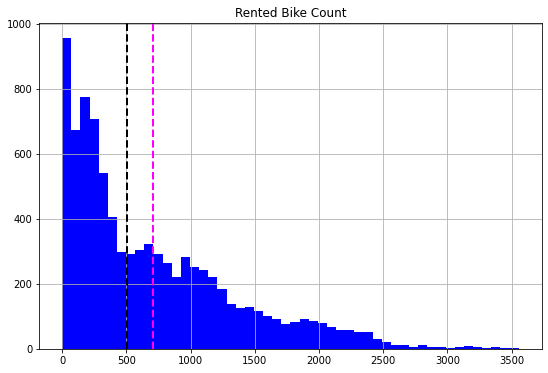

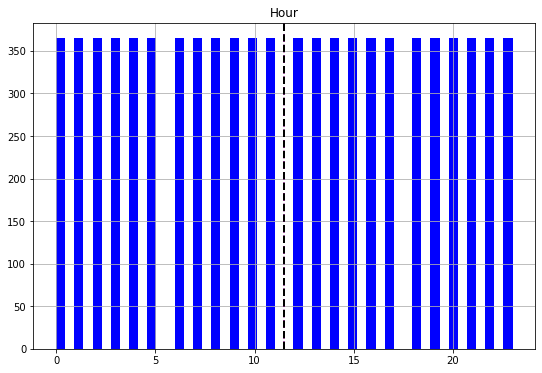

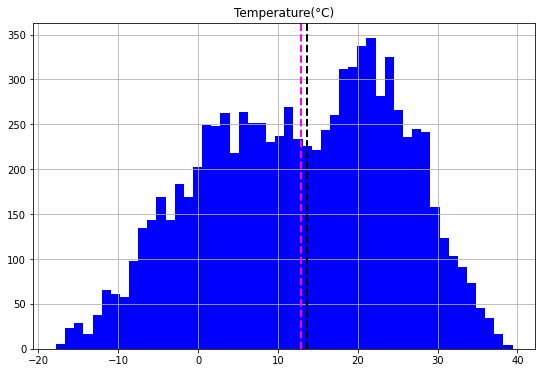

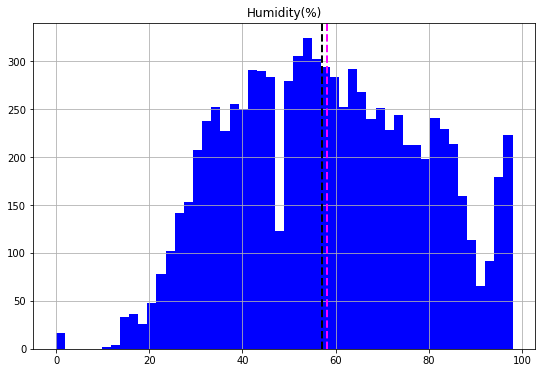

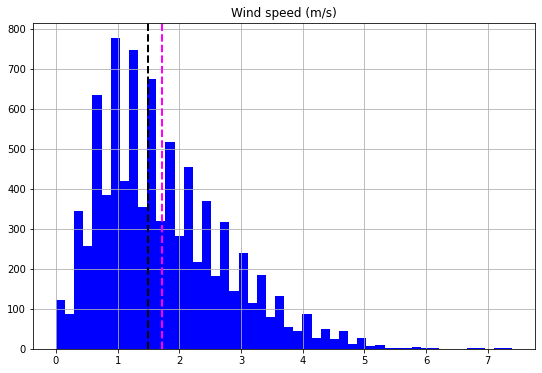

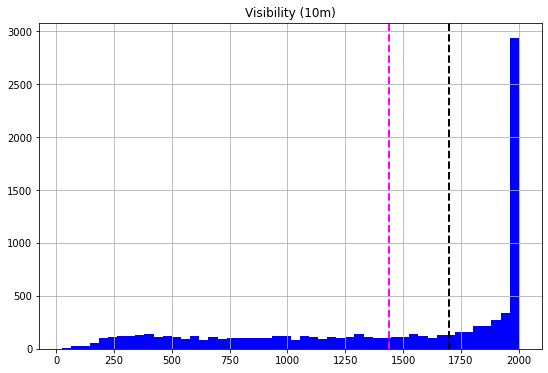

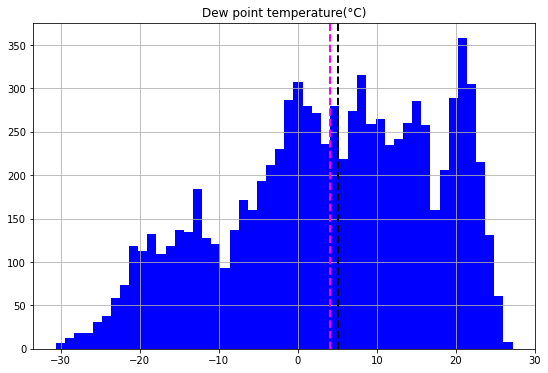

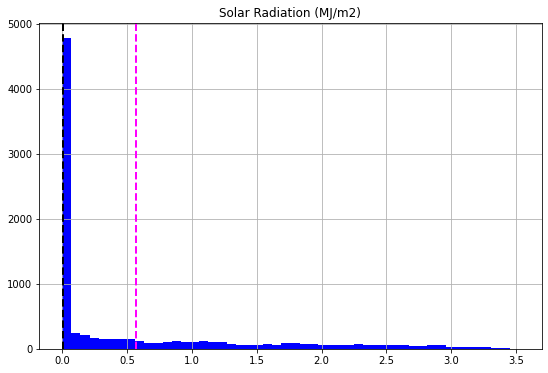

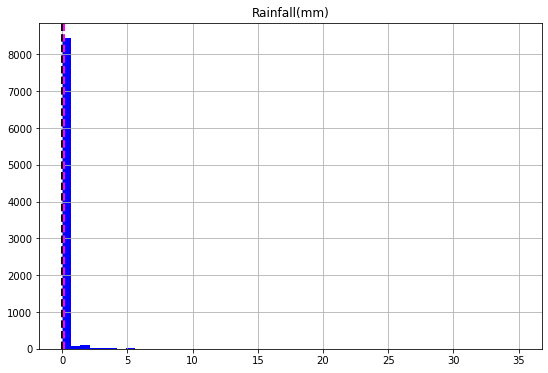

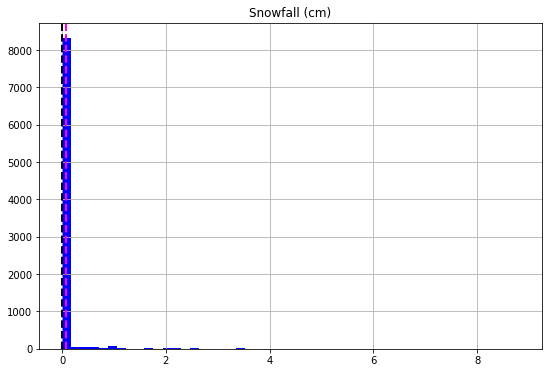

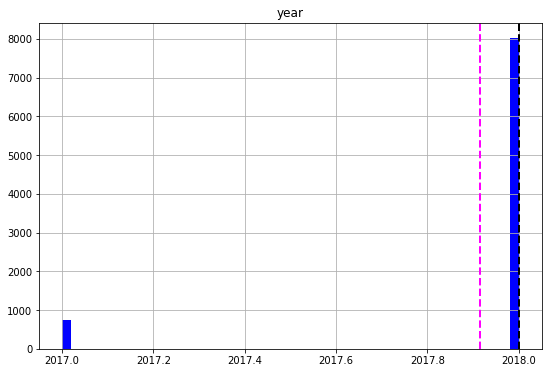

In [17]:
# Histogram plot of numerical features
for col in numeric_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df[col]
    feature.hist(bins=50, ax = ax,color='blue')
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='black', linestyle='dashed', linewidth=2)    
    ax.set_title(col)
plt.show()

**The distribution of temperature, humidity and dew point temperature are nearly normal.**

**The distribution of rented bike count and wind speed are slightly right skewed. Visibility column is severely left skewed.**

**Columns like snowfall, rainfall and solar radiation contains most of the values as zero.**

**There are less data for the year 2017.**




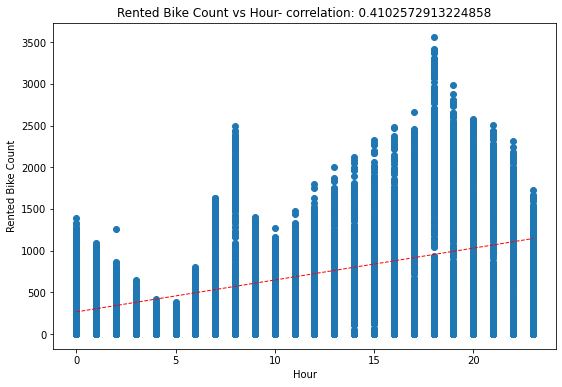

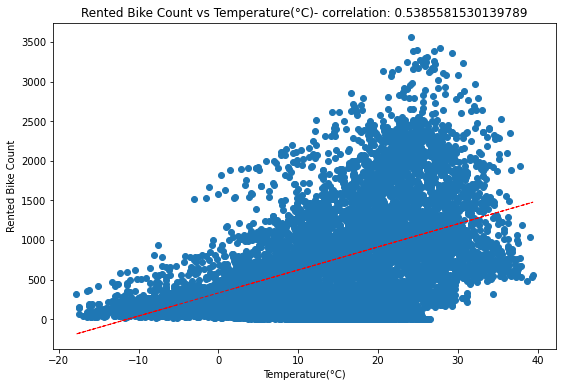

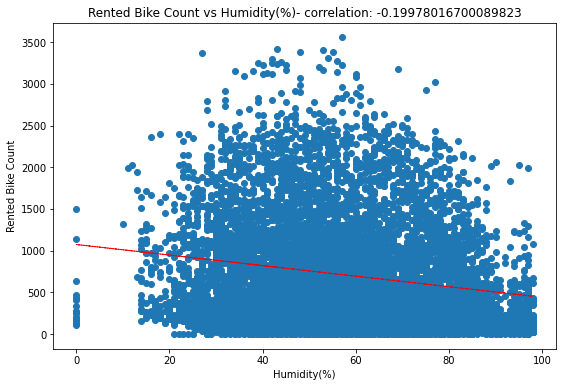

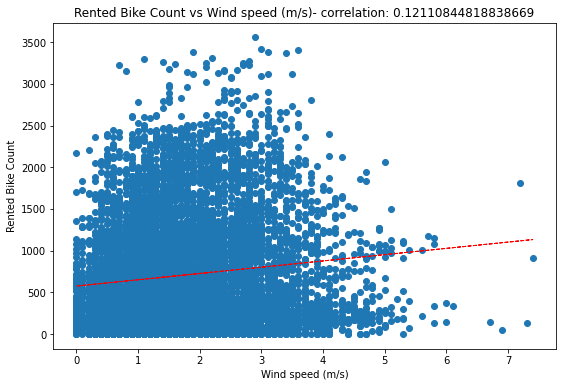

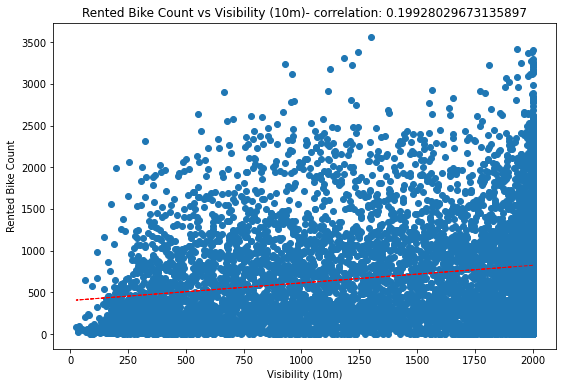

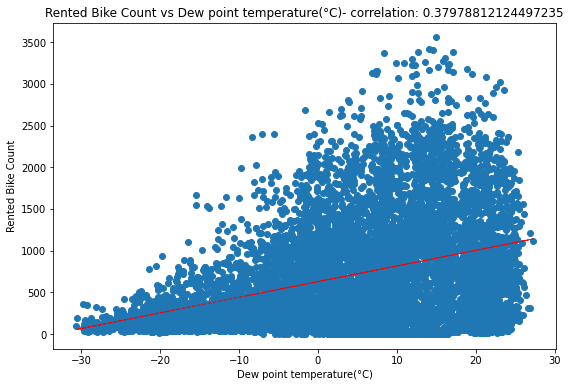

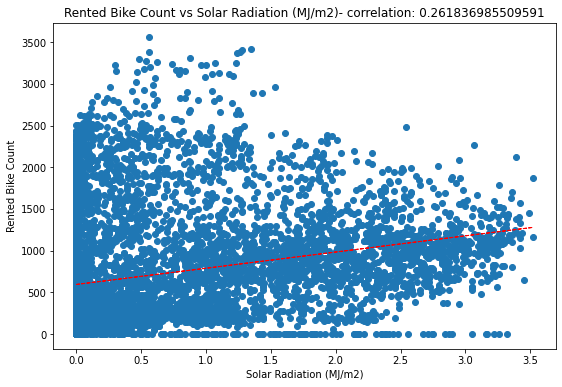

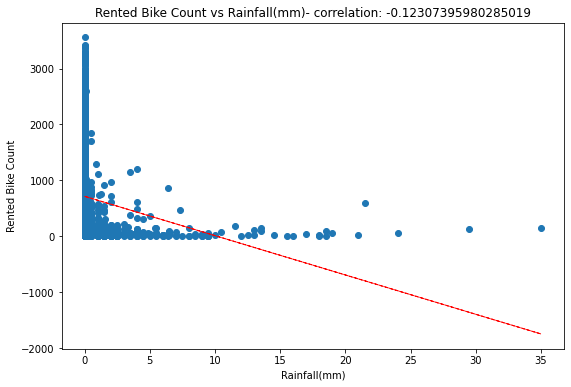

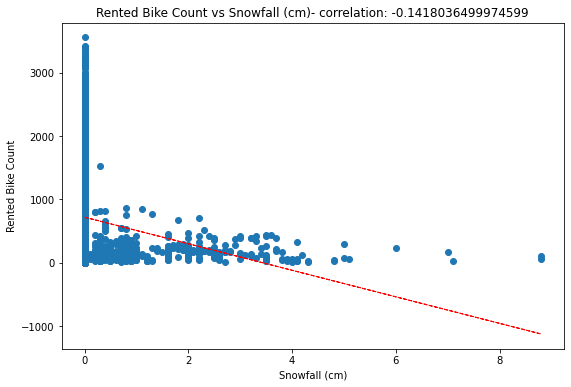

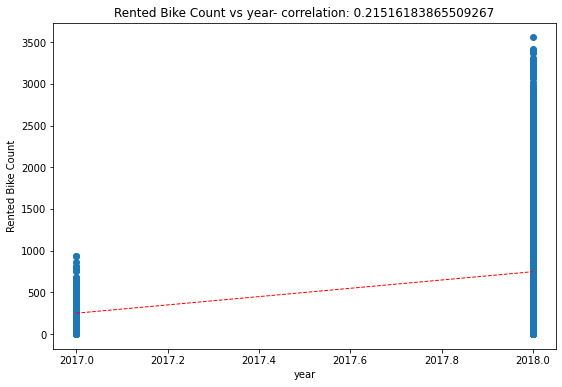

In [18]:
# Relation of numeric features with Rented Bike Count
for col in numeric_features[1:]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df[col]
    label = df['Rented Bike Count']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('Rented Bike Count')
    ax.set_title('Rented Bike Count vs ' + col + '- correlation: ' + str(correlation))
    z = np.polyfit(df[col], df['Rented Bike Count'], 1)
    y_hat = np.poly1d(z)(df[col])

    plt.plot(df[col], y_hat, "r--", lw=1)

plt.show()

**Columns like hour, temperature and dew point temperature are highly correlated with the dependent variable as compared to other variables.**

**Columns like humidity, snowfall and rainfall are negatively correlated with dependent variable with very low correlation coefficient.**

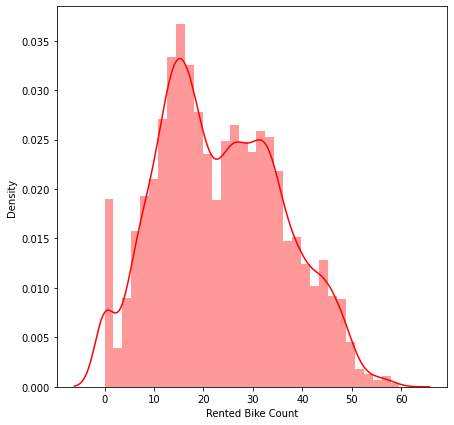

In [19]:
# Square root transform of dependent variable to make the distribution normal
plt.figure(figsize=(7,7))
sns.distplot(np.sqrt(df['Rented Bike Count']),color="r")
plt.show()

In [20]:
# Extracting names of categorical columns from the data
categorical_features = df.describe(include=['object','category']).columns
categorical_features

Index(['Seasons', 'Holiday', 'Functioning Day', 'month'], dtype='object')

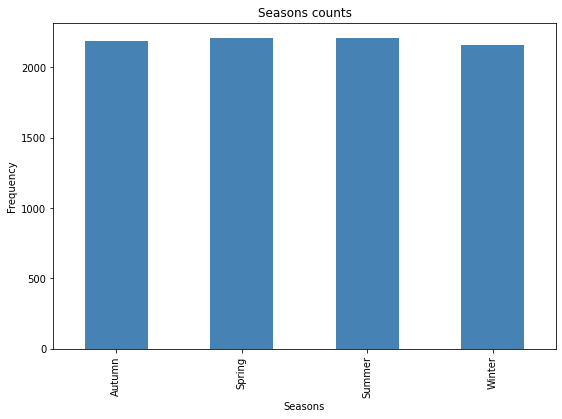

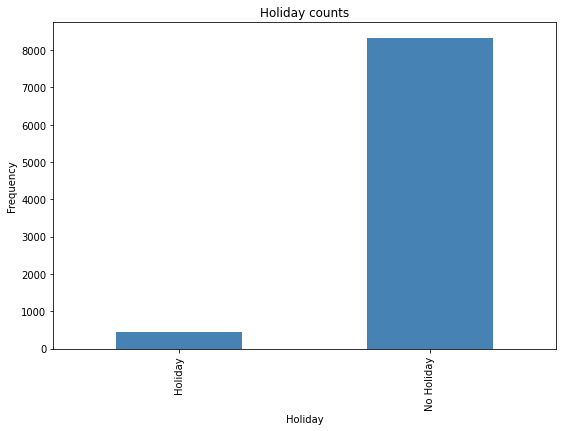

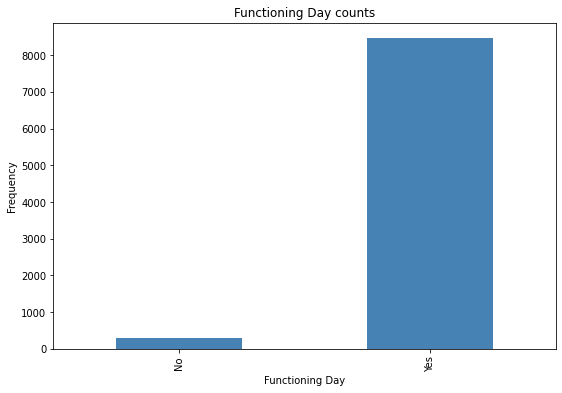

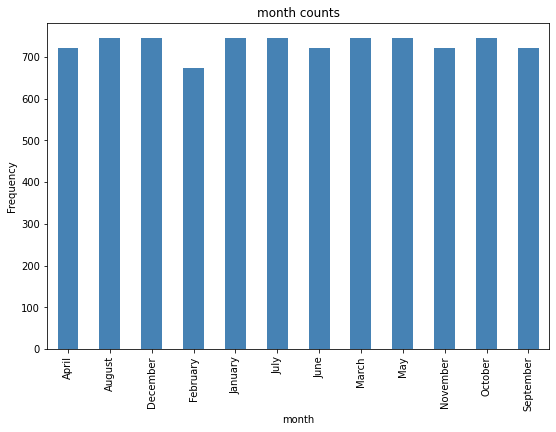

In [21]:
# Bar plot of categorical features
for col in categorical_features:
    counts = df[col].value_counts().sort_index()
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    counts.plot.bar(ax = ax, color='steelblue')
    ax.set_title(col + ' counts')
    ax.set_xlabel(col) 
    ax.set_ylabel("Frequency")
plt.show()

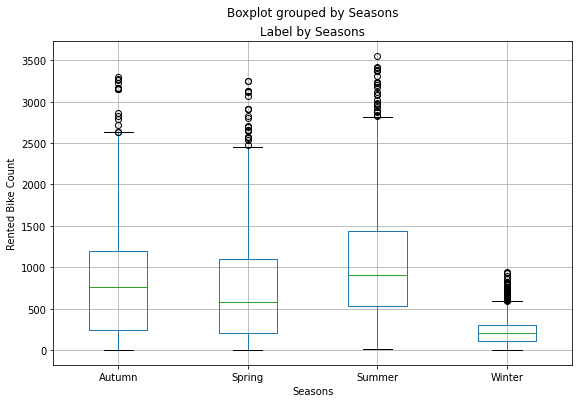

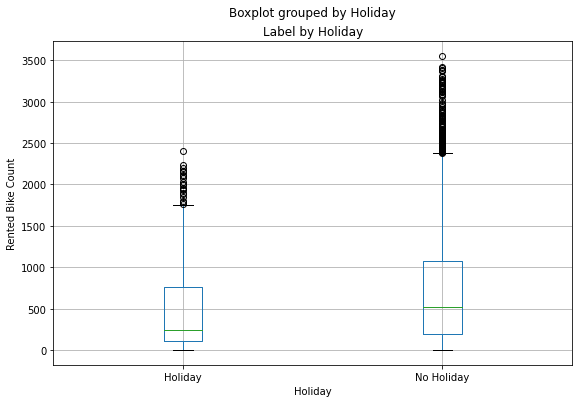

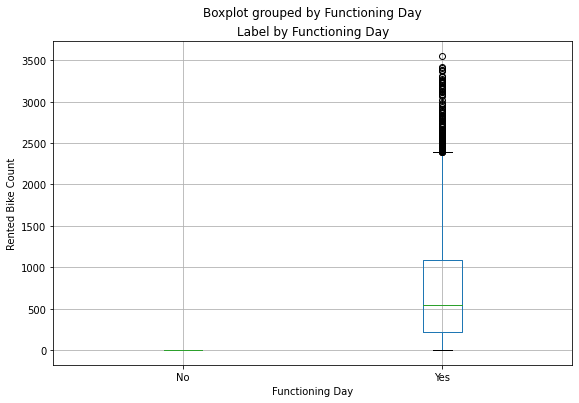

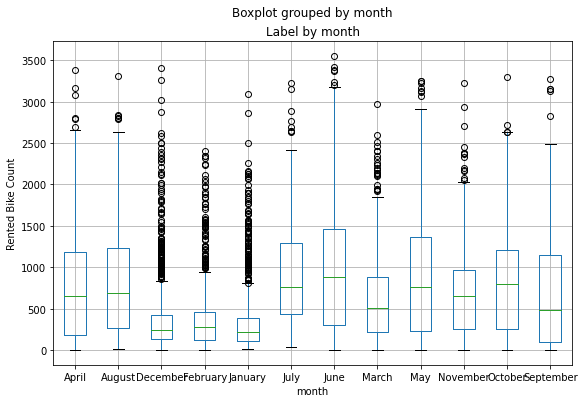

In [22]:
# Box plot of categorical features with respect to dependent variable
for col in categorical_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    df.boxplot(column = 'Rented Bike Count', by = col, ax = ax)
    ax.set_title('Label by ' + col)
    ax.set_ylabel("Rented Bike Count")
plt.show()

**Bike renting is less in winter season as compared to other seasons.**

**In holidays bike renting is slightly less.**

**There are very few peoples renting bikes in the month of December, January and february.**

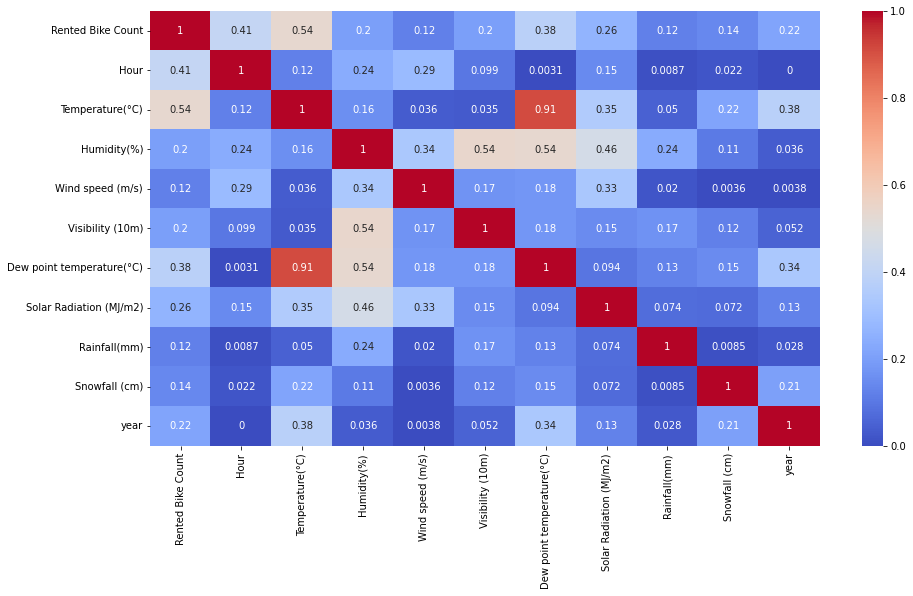

In [23]:
## Correlation matrix
plt.figure(figsize=(15,8))
correlation = df.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')
plt.show()

In [24]:
# Checking Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

  # Calculating VIF
  vif = pd.DataFrame()
  vif["variables"] = X.columns
  vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

  return(vif)

In [25]:
calc_vif(df[[i for i in df.describe().columns if i not in ['Rented Bike Count']]])

,variables,VIF
0,Hour,4.450547
1,Temperature(°C),188.496720
2,Humidity(%),186.877169
3,Wind speed (m/s),4.811966
4,Visibility (10m),10.313000
5,Dew point temperature(°C),126.950456
6,Solar Radiation (MJ/m2),2.888695
7,Rainfall(mm),1.103251
8,Snowfall (cm),1.127819
9,year,397.756221


**As year has high VIF value, including it in our model results in unstable parameter estimate.**

In [26]:
# VIF without year column
calc_vif(df[[i for i in df.describe().columns if i not in ['Rented Bike Count','year']]])

,variables,VIF
0,Hour,4.418242
1,Temperature(°C),33.385256
2,Humidity(%),5.371996
3,Wind speed (m/s),4.805364
4,Visibility (10m),9.085977
5,Dew point temperature(°C),17.126199
6,Solar Radiation (MJ/m2),2.881590
7,Rainfall(mm),1.081567
8,Snowfall (cm),1.120833


# Data preparation

In [27]:
# Creating a list of columns
x = list(df.describe().columns)

In [28]:
# Numeical features that will go to our model
numerical_features = [i for i in x if i not in ['Rented Bike Count','year','Rainfall(mm)','Snowfall (cm)']]

**As in snowfall and rainfall columns most of the values are zero and also correlation of them with the dependent variable is very less, we are not going to include them in our model building.**

In [29]:
# Creating a copy so that we can make changes in the data during encoding.
df1 = df.copy()

In [30]:
# Converting categorical features to numeric 
#label encoding
encoders_nums = {"Holiday":{"Holiday":1,"No Holiday":0} ,"Functioning Day":{"Yes":1,"No":0}}
df1= df1.replace(encoders_nums)

In [31]:
# One hot encoding
df1 = pd.get_dummies(df1, columns=['Seasons','month'])

In [32]:
df1.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Functioning Day,year,Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter,month_April,month_August,month_December,month_February,month_January,month_July,month_June,month_March,month_May,month_November,month_October,month_September
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,0,1,2017,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,0,1,2017,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,0,1,2017,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,0,1,2017,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,0,1,2017,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0


In [33]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 29 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rented Bike Count          8760 non-null   int64  
 1   Hour                       8760 non-null   int64  
 2   Temperature(°C)            8760 non-null   float64
 3   Humidity(%)                8760 non-null   int64  
 4   Wind speed (m/s)           8760 non-null   float64
 5   Visibility (10m)           8760 non-null   int64  
 6   Dew point temperature(°C)  8760 non-null   float64
 7   Solar Radiation (MJ/m2)    8760 non-null   float64
 8   Rainfall(mm)               8760 non-null   float64
 9   Snowfall (cm)              8760 non-null   float64
 10  Holiday                    8760 non-null   int64  
 11  Functioning Day            8760 non-null   int64  
 12  year                       8760 non-null   int64  
 13  Seasons_Autumn             8760 non-null   uint8

In [34]:
#Final feature list
features = numerical_features.copy()
features.extend(['Holiday','Functioning Day', 'Seasons_Autumn', 'Seasons_Spring', 'Seasons_Summer','Seasons_Winter',
                  'month_April', 'month_August','month_December', 'month_February', 'month_January', 'month_July',
                  'month_June', 'month_March', 'month_May', 'month_November','month_October', 'month_September'])
features

['Hour',
 'Temperature(°C)',
 'Humidity(%)',
 'Wind speed (m/s)',
 'Visibility (10m)',
 'Dew point temperature(°C)',
 'Solar Radiation (MJ/m2)',
 'Holiday',
 'Functioning Day',
 'Seasons_Autumn',
 'Seasons_Spring',
 'Seasons_Summer',
 'Seasons_Winter',
 'month_April',
 'month_August',
 'month_December',
 'month_February',
 'month_January',
 'month_July',
 'month_June',
 'month_March',
 'month_May',
 'month_November',
 'month_October',
 'month_September']

In [35]:
len(features)

25

**There are total 25 features and 1 dependent variable which we will use to fit our model.**

In [36]:
#Normalizing the features
X = df1[features].apply(zscore)

In [37]:
#Transforming dependent variable using squareroot transformation.
y = np.sqrt(df1['Rented Bike Count'])

In [38]:
#Splitting the data into two parts where the test data contains 20% of orignal data.
X_train, X_test, y_train, y_test = train_test_split( X,y , test_size = 0.2, random_state = 5) 

# Linear Regression

**Model fitting**

In [39]:
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [40]:
y_train_pred = reg.predict(X_train)
y_test_pred = reg.predict(X_test)

**Model evaluation**

In [41]:
#Mean Squared Error and Root Mean Square Error for train data

MSE_train  = mean_squared_error((y_train)**2,(y_train_pred)**2)
print("Train MSE :" , MSE_train)

RMSE_train = np.sqrt(MSE_train)
print("Train RMSE :" ,RMSE_train)

#Mean Square Error and Root Mean Square Error for test data

MSE_test  = mean_squared_error((y_test)**2,(y_test_pred)**2)
print("Test MSE :" , MSE_test)

RMSE_test = np.sqrt(MSE_test)
print("Test RMSE :" ,RMSE_test)

Train MSE : 174034.02236206582
Train RMSE : 417.1738514840855
Test MSE : 174523.16367219805
Test RMSE : 417.75969608400237


In [42]:
#r-square matrix for train and test datas
r2_train = r2_score((y_train)**2, (y_train_pred)**2)
r2_test = r2_score((y_test)**2, (y_test_pred)**2)
print("train r2 score :" , r2_train)
print("test r2 score :" , r2_test)

train r2 score : 0.5816455266845847
test r2 score : 0.5803383653606353


**As the accuracy score is very low, the model has high bias. To decrease the bias next we will try to do polynomial regression.** 

In [43]:
# To surpass 
np.set_printoptions(suppress=True)

In [44]:
coefficients = pd.concat([pd.DataFrame(X.columns),pd.DataFrame(np.transpose(reg.coef_))], axis = 1)

In [45]:
coefficients

,0,0
0,Hour,3.243739
1,Temperature(°C),-0.820868
2,Humidity(%),-6.979182
3,Wind speed (m/s),0.050592
4,Visibility (10m),0.268630
5,Dew point temperature(°C),8.263278
6,Solar Radiation (MJ/m2),-0.653889
7,Holiday,-0.511502
8,Functioning Day,5.033267
9,Seasons_Autumn,1.432242


**Functioning day,dew point temperature and humidity are affecting rented bike count the most.**

# Polynomial regression

Best degree 3 with RMSE 5.121821248694093


Text(0, 0.5, 'RMSE')

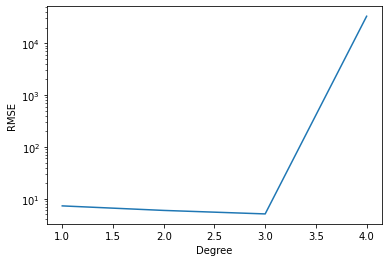

In [46]:
rmses = []
degrees = np.arange(1,5)
min_rmse, min_deg = 1e10, 0

for deg in degrees:

    # Train features
    poly_features = PolynomialFeatures(degree=deg, include_bias=True)
    X_poly_train = poly_features.fit_transform(X_train)

    # Linear regression
    poly_reg = LinearRegression()
    poly_reg.fit(X_poly_train, y_train)

    # Compare with test data
    X_poly_test = poly_features.fit_transform(X_test)
    poly_predict = poly_reg.predict(X_poly_test)
    poly_mse = mean_squared_error(y_test, poly_predict)
    poly_rmse = np.sqrt(poly_mse)
    rmses.append(poly_rmse)
    
    # Cross-validation of degree
    if min_rmse > poly_rmse:
        min_rmse = poly_rmse
        min_deg = deg

# Plot and present results
print('Best degree {} with RMSE {}'.format(min_deg, min_rmse))
        
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(degrees, rmses)
ax.set_yscale('log')
ax.set_xlabel('Degree')
ax.set_ylabel('RMSE')

**From the above plot, it is clear that best degree for polynomial regression is 3 for which RMSE = 5.12**

**model fitting**

In [47]:
# Fitting three degree polynomial regression model 
poly = PolynomialFeatures(degree=3,include_bias=True)
X_train_trans = poly.fit_transform(X_train)
X_test_trans = poly.fit_transform(X_test)
lr = LinearRegression()
lr.fit(X_train_trans, y_train)

LinearRegression()

**model evaluation**

In [48]:
# r2 score calculation
y_pred_train = lr.predict(X_train_trans)
print("Train r2 score:", r2_score((y_train)**2, (y_pred_train)**2))
y_pred_test = lr.predict(X_test_trans)
print("Test r2 score:",r2_score((y_test)**2, (y_pred_test)**2))

Train r2 score: 0.8582122510587127
Test r2 score: 0.7985329294666633


In [49]:
#MSE and RMSE for train data
MSE_tr = mean_squared_error((y_train)**2, (y_pred_train)**2)
print("Train MSE :" , MSE_tr)
print("Train RMSE :" , np.sqrt(MSE_tr))

Train MSE : 58983.21601382942
Train RMSE : 242.8646042835996


In [50]:
#MSE and RMSE for test data
MSE_te = mean_squared_error((y_test)**2, (y_pred_test)**2)
print("Test MSE :" , MSE_te)
print("Test RMSE :" , np.sqrt(MSE_te))

Test MSE : 83783.38075974716
Test RMSE : 289.45358999284696


**At degree 3, the model is overfitting the data. We will now apply some regularization techniques to decrease the variance.**

# Ridge

In [51]:
# Performing gridsearchcv on ridge regressor
ridge = Ridge()
parameters = {'alpha': [1e-3,1e-2,1e-1,1,5,10,20,30,100,.0014]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)
ridge_regressor.fit(X_train_trans,y_train)

GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 100,
                                   0.0014]},
             scoring='neg_mean_squared_error')

In [52]:
# Best parameter from gridsearchcv
print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 100}

Using  {'alpha': 100}  the negative mean squared error is:  -28.978645270025194


In [53]:
# Prediction on train and test data
y_pred_train_ridge = ridge_regressor.predict(X_train_trans)
y_pred_test_ridge = ridge_regressor.predict(X_test_trans)

In [54]:
# Calculation of r2 score
r2_train_ridge = r2_score((y_train)**2, (y_pred_train_ridge)**2)
r2_test_ridge = r2_score((y_test)**2, (y_pred_test_ridge)**2)
print("r2_train_ridge :" ,r2_train_ridge)
print("r2_test_ridge :" ,r2_test_ridge)

r2_train_ridge : 0.8318716751074617
r2_test_ridge : 0.801290926955565


In [55]:
# Calculation of adjusted r2
print("Adjusted_Train_R2_ridge : ",1-(1-r2_score((y_train)**2, (y_pred_train_ridge)**2))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)))
print("Adjusted_Test_R2_ridge : ",1-(1-r2_score((y_test)**2, (y_pred_test_ridge)**2))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

Adjusted_Train_R2_ridge :  0.8312696687880241
Adjusted_Test_R2_ridge :  0.7984127538234035


# Lasso

In [56]:
# Performing gridsearchcv on lasso regressor
lasso = Lasso()
parameters = {'alpha': [1e-3,1e-2,1e-1,1,5,10,20,30,100,.0014]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=3)
lasso_regressor.fit(X_train_trans, y_train)

GridSearchCV(cv=3, estimator=Lasso(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 100,
                                   0.0014]},
             scoring='neg_mean_squared_error')

In [57]:
# Best parameter from gridsearchcv
print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.01}

Using  {'alpha': 0.01}  the negative mean squared error is:  -27.132798018535315


In [58]:
# Predictions
y_pred_lasso_test = lasso_regressor.predict(X_test_trans)
y_pred_lasso_train = lasso_regressor.predict(X_train_trans)

In [59]:
# Calculation of r2 score
r2_train_lasso = r2_score((y_train)**2, (y_pred_lasso_train)**2)
r2_test_lasso = r2_score((y_test)**2, (y_pred_lasso_test)**2)
print("r2_train_lasso :" ,r2_train_lasso)
print("r2_test_lasso :" ,r2_test_lasso)

r2_train_lasso : 0.8372026269748784
r2_test_lasso : 0.8143635286473234


In [60]:
# Calculation of adjusted r2
print("Adjusted_Train_R2_lasso : ",1-(1-r2_score((y_train)**2, (y_pred_lasso_train)**2))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)))
print("Adjusted_Test_R2_lasso : ",1-(1-r2_score((y_test)**2, (y_pred_lasso_test)**2))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

Adjusted_Train_R2_lasso :  0.83661970885319
Adjusted_Test_R2_lasso :  0.8116747037436056


In [61]:
#MSE and RMSE in test data
MSE  = mean_squared_error((y_test)**2, (y_pred_lasso_test)**2)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

MSE : 77199.96682864164
RMSE : 277.8488200958241


# ElasticNet

In [62]:
# Performing gridsearchcv on elesticnet regression
elastic = ElasticNet()
parameters = {'alpha': [1e-3,1e-2,1e-1,1,5,10,20,30,100,.0014],'l1_ratio':[0.3,0.4,0.5,0.6,0.7,0.8]}
elastic_regressor = GridSearchCV(elastic, parameters, scoring='neg_mean_squared_error', cv=3)
elastic_regressor.fit(X_train_trans, y_train)

GridSearchCV(cv=3, estimator=ElasticNet(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 100,
                                   0.0014],
                         'l1_ratio': [0.3, 0.4, 0.5, 0.6, 0.7, 0.8]},
             scoring='neg_mean_squared_error')

In [68]:
# Best parameter from gridsearchcv
print("The best fit parameters are found out to be :" ,elastic_regressor.best_params_)
print("\nUsing ",elastic_regressor.best_params_, " the negative mean squared error is: ", elastic_regressor.best_score_)

The best fit parameters are found out to be : {'alpha': 0.01, 'l1_ratio': 0.8}

Using  {'alpha': 0.01, 'l1_ratio': 0.8}  the negative mean squared error is:  -27.497728986677075


In [64]:
# Prediction
y_pred_elasticnet_test = elastic_regressor.predict(X_test_trans)
y_pred_elasticnet_train = elastic_regressor.predict(X_train_trans)

In [65]:
# r2 score calculation
r2_train_elasticnet = r2_score((y_train)**2, (y_pred_elasticnet_train)**2)
r2_test_elasticnet = r2_score((y_test)**2, (y_pred_elasticnet_test)**2)
print("r2_train_elasticnet :" ,r2_train_elasticnet)
print("r2_test_elasticnet :" ,r2_test_elasticnet)

r2_train_elasticnet : 0.8353049619453147
r2_test_elasticnet : 0.8116156902032226


In [66]:
# adjusted r2 score calculation
print("Adjusted_Train_R2_elasticnet : ",1-(1-r2_score((y_train)**2, (y_pred_elasticnet_train)**2))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)))
print("Adjusted_Test_R2_elasticnet : ",1-(1-r2_score((y_test)**2, (y_pred_elasticnet_test)**2))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

Adjusted_Train_R2_elasticnet :  0.8347152489760555
Adjusted_Test_R2_elasticnet :  0.8088870646267918


# Conclusion

**Lasso_regressor is the best model for this data with accuracy score of 81%.**